Load dmbounds:

In [1]:
from dmbounds import dmbounds as bounds

Load all metadata into a Pandas dataframe and display the information in HTML:

In [2]:
metadata_all = bounds.metadata()
bounds.show_metadata(metadata_all)

,Instrument,Target,Mode,Channel,Year,Observation time,Title,DOI,Arxiv,Comment,File name
0,magic,ursamajor2,ann,WW,2018,94.8h,Indirect dark matter searches in the dwarf satellite galaxy Ursa Major II with the MAGIC Telescopes,10.1088/1475-7516/2018/03/009,1712.03095,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2018_ursamajor2_ann_WW.ecsv
1,magic,ursamajor2,ann,mumu,2018,94.8h,Indirect dark matter searches in the dwarf satellite galaxy Ursa Major II with the MAGIC Telescopes,10.1088/1475-7516/2018/03/009,1712.03095,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2018_ursamajor2_ann_mumu.ecsv
2,magic,segue1,dec,WW,2014,157.9h,Optimized dark matter searches in deep observations of Segue 1 with MAGIC,10.1088/1475-7516/2014/02/008,1312.1535,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2014_segue1_dec_WW.ecsv
3,magic,segue1,dec,tautau,2014,157.9h,Optimized dark matter searches in deep observations of Segue 1 with MAGIC,10.1088/1475-7516/2014/02/008,1312.1535,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2014_segue1_dec_tautau.ecsv
4,magic,segue1,ann,mumu,2022,h,"Combined searches for dark matter in dwarf spheroidal galaxies observed with the MAGIC telescopes, including new data from Coma Berenices and Draco",10.1016/j.dark.2021.100912,2111.15009,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2022_segue1_ann_mumu.ecsv
5,magic,perseuscluster,dec,bb,2018,202.2h,Constraining dark matter lifetime with a deep gamma-ray survey of the Perseus galaxy cluster with MAGIC,10.1016/j.dark.2018.08.002,1806.11063,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2018_perseuscluster_dec_bb.ecsv
6,magic,comaberenices,ann,WW,2022,h,"Combined searches for dark matter in dwarf spheroidal galaxies observed with the MAGIC telescopes, including new data from Coma Berenices and Draco",10.1016/j.dark.2021.100912,2111.15009,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2022_comaberenices_ann_WW.ecsv
7,magic,triangulum2,ann,WW,2020,62.4h,A search for dark matter in Triangulum II with the MAGIC telescopes.,10.1016/j.dark.2020.100529,2003.05260,No error in J,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2020_triangulum2_ann_WW_noJerror.ecsv
8,magic,triangulum2,ann,tautau,2020,62.4h,A search for dark matter in Triangulum II with the MAGIC telescopes.,10.1016/j.dark.2020.100529,2003.05260,no J error,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2020_triangulum2_ann_tautau_noJerror.ecsv
9,magic,segue1,ann,WW,2014,157.9h,Optimized dark matter searches in deep observations of Segue 1 with MAGIC,10.1088/1475-7516/2014/02/008,1312.1535,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2014_segue1_ann_WW.ecsv


Alternatively, the metadata can also be loaded and selected interactively by a drop-down menu:

In [3]:
selection, metadata_all = bounds.interactive_selection()

Output()

Once the final set of limits is chosen, it must be loaded into a filtered pandas dataframe with the following command, and is again displayed with `show_metadata()`:

In [4]:
metadata_filtered = bounds.filter_metadata(selection, metadata_all)
bounds.show_metadata(metadata_filtered)

,Instrument,Target,Mode,Channel,Year,Observation time,Title,DOI,Arxiv,Comment,File name
27,magic,"[multidsph, 4]",ann,bb,2022,354.4h,"Combined searches for dark matter in dwarf spheroidal galaxies observed with the MAGIC telescopes, including new data from Coma Berenices and Draco",10.1016/j.dark.2021.100912,2111.15009,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/magic/magic_2022_multidsph_ann_bb.ecsv
183,hess,fornaxcluster,ann,bb,2012,14.5h,Search for Dark Matter Annihilation Signals From the Fornax Galaxy Cluster With H.E.S.S.,10.1088/0004-637X/783/1/63,1202.5494,"NFW RB02 with high substructure, theta = 1.0 degrees",/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/hess/hess_2012_fornaxcluster_ann_bb_nfwrb02_substructure-high_theta1deg.ecsv
199,veritas,comacluster,ann,bb,2012,18.6h,"Constraints on Cosmic Rays, Magnetic Fields, and Dark Matter from Gamma- Ray Observations of the Coma Cluster of Galaxies with VERITAS and Fermi",10.1088/0004-637X/757/2/123,1208.0676,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/veritas/veritas_2012_comacluster_ann_bb.ecsv
226,cta,segue1,ann,bb,2019,500h,Science with the Cherenkov Telescope Array,10.1142/10986,1709.07997,sensitivity,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/cta/cta_2019_segue1_ann_bb_sens.ecsv
230,cta,gc,ann,bb,2015,500h,Indirect detection of dark matter with γ rays,10.1073/pnas.1308728111,1310.2695,"sensitivity, Einasto profile",/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/cta/cta_2015_gc_ann_bb_sens_einasto.ecsv
256,lat,"[multidsph, 45]",ann,bb,2017,6y,Searching for Dark Matter Annihilation in Recently Discovered Milky Way Satellites with Fermi-LAT,10.3847/1538-4357/834/2/110,1611.03184,original data,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/lat/lat_2017_multidsph_ann_bb.ecsv
296,hawc,"[multidsph, 15]",ann,bb,2018,507d,Dark Matter Limits From Dwarf Spheroidal Galaxies with The HAWC Gamma-Ray Observatory,10.3847/1538-4357/aaa6d8,1706.01277,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/hawc/hawc_2018_multidsph_ann_bb.ecsv


The dataframe can also be filtered manually from the full database. This might be useful for a reproducible plotting script:

In [5]:
include_by_arxiv_ids = ['1110.1529', '1804.00628']
exclude_by_targets = ['fornaxcluster']
exclude_by_comments = ['MIN model', 'MAX model']
metadata_filtered = metadata_all.loc[(metadata_all['Arxiv'].isin(include_by_arxiv_ids)) \
                                     & (metadata_all['Channel'] == 'bb') \
                                     & (metadata_all['Mode'] == 'ann') \
                                     & (~metadata_all['Target'].isin(exclude_by_targets)) \
                                     & (~metadata_all['Comment'].isin(exclude_by_comments))
                                    ]
bounds.show_metadata(metadata_filtered)

,Instrument,Target,Mode,Channel,Year,Observation time,Title,DOI,Arxiv,Comment,File name
251,lat,"[multicluster, 8]",ann,bb,2012,3y,Probing Dark Matter Decay and Annihilation with Fermi LAT Observations of Nearby Galaxy Clusters,10.1088/1475-7516/2012/01/042,1110.1529,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/lat/lat_2012_multicluster_ann_bb.ecsv
290,hawc,m31,ann,bb,2018,1017d,Search for Dark Matter Gamma-ray Emission from the Andromeda Galaxy with the High-Altitude Water Cherenkov Observatory,10.1088/1475-7516/2018/06/043,1804.00628,MED model,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/hawc/hawc_2018_m31_ann_bb_med.ecsv


You can retrieve a matplotlib figure from the filtered dataframe with the following method. Note that currently, only ten curves can be plotted simultaneously:

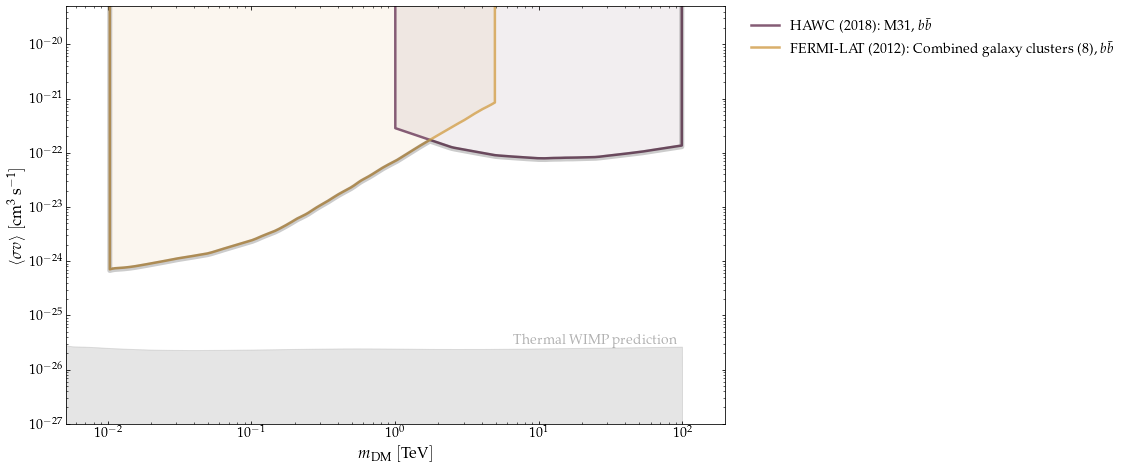

In [6]:
fig1, ax1 = bounds.plot(metadata_filtered)

You can also define your own style for the figure:

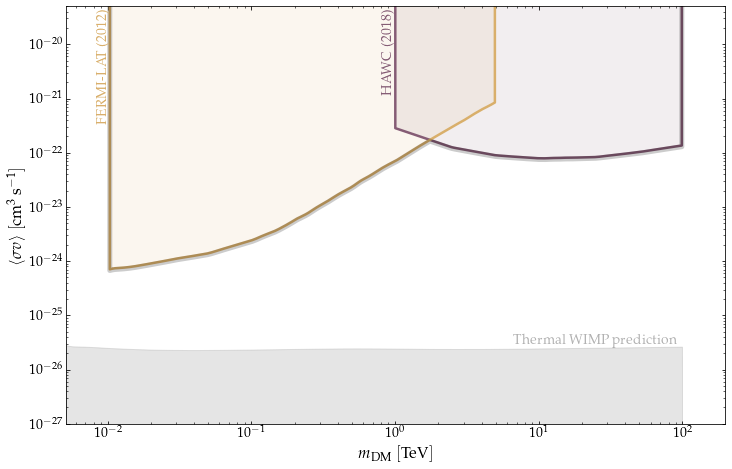

In [7]:
style = bounds.PlottingStyle('antique', legend='fancy')
fig1, ax1 = bounds.plot(metadata_filtered, style)

Additionally, for example, you can scale the axes or modify the colors:

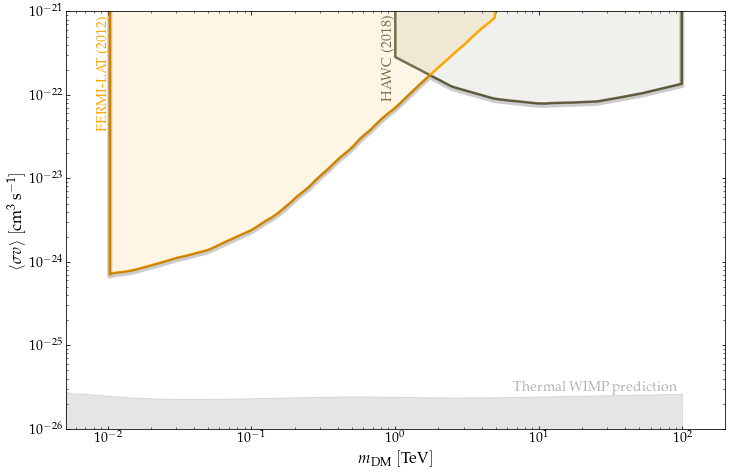

In [8]:
style.ymin = 1e-26
style.ymax = 1e-21
style.color_cycle = ['orange',3]
fig2, ax2 = bounds.plot(metadata_filtered, style);

You can also manually modify the matplotlib figure. However, you might have to modify each element individually to fit again, see e.g.:

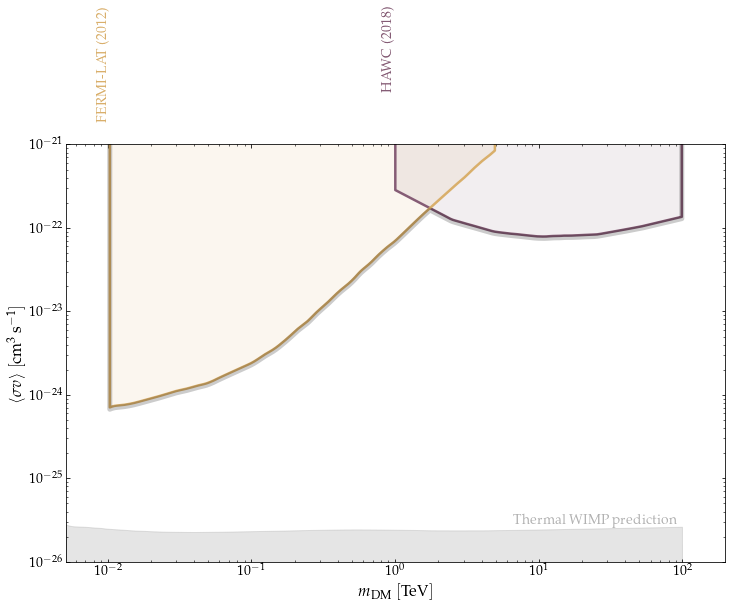

In [9]:
ax1.set_ylim([style.ymin,style.ymax]);
fig1

So let's move the label again to a suitable position:

In [10]:
import matplotlib
children = ax1.get_children()
texts = [element for element in children if isinstance(element, matplotlib.text.Text)]
texts

[Text(1.0039878060175302, 4.5e-20, 'HAWC (2018)'),
 Text(0.010352573089638026, 4.5e-20, 'FERMI-LAT (2012)'),
 Text(90.00000686645508, 2.592493e-26, 'Thermal WIMP prediction'),
 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, '')]

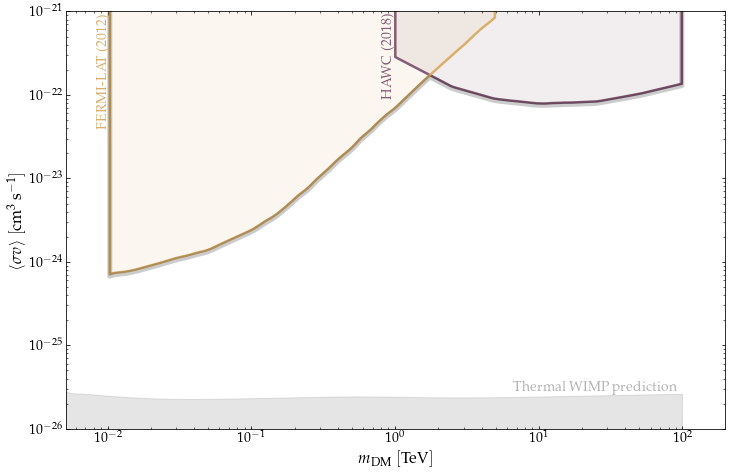

In [11]:
for text in texts[:2]:
    text.set_position((text.get_position()[0], 0.95 * style.ymax))
fig1

You can retrieve the data with the following command:

In [12]:
data = bounds.get_data(metadata_filtered)
display(bounds.show_metadata(metadata_filtered.iloc[[0]]))
display(data[0])

,Instrument,Target,Mode,Channel,Year,Observation time,Title,DOI,Arxiv,Comment,File name
251,lat,"[multicluster, 8]",ann,bb,2012,3y,Probing Dark Matter Decay and Annihilation with Fermi LAT Observations of Nearby Galaxy Clusters,10.1088/1475-7516/2012/01/042,1110.1529,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/lat/lat_2012_multicluster_ann_bb.ecsv


mass,sigmav
GeV,cm3 / s
float32,float32
10.31,7.055e-25
11.31,7.404e-25
11.92,7.47e-25
21.85,9.456e-25
23.81,9.86e-25
31.1,1.129e-24
33.99,1.167e-24
44.4,1.319e-24


Finally, save the figure in desired format and resolution:

In [ ]:
fig2.savefig("test.png", format='png', dpi=300, bbox_inches="tight")